In [194]:
import pandas as pd
import statsmodels.api as sm
from scipy.stats import shapiro, levene
import scipy.stats as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scikit_posthocs as sp
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [195]:
df = pd.read_csv('/Users/elizabethalabi/Documents/Uni-Masters-2023:24/Data Science/Advanced Mathematics and Statistics for Data Science and AI/Class_Assign_Task_1/Datasets/MASTER_PhonesmartdataAll_CCI_AdvStats (3).csv')

df.dropna()

df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_correct_Conjunction,VS_RT_correct_Single
0,2022,,2,4,49,70,,,,1178.700000,1216.387500
1,2021,37,2,8,44,33,,,,946.470000,785.597500
2,2022,,1,,,,,,,1182.741667,950.900000
3,2022,,1,,,,,,,1778.950000,984.333333
4,2022,,2,,,,,,,521.500000,503.000000
...,...,...,...,...,...,...,...,...,...,...,...
543,2020,38,1,3,56,39,iPhone,507,,915.785917,747.883194
544,2020,27,2,5,64,77,iPhone,267,,877.783333,720.729583
545,2020,36,2,2,46,43,iPhone,610,,1211.483333,1049.979167
546,2020,31,2,4,67,69,iPhone,558,,899.774583,845.612083


In [196]:
# Section 1: Data Preparation
# 'VS_RT_correct_Single' in descending order
df.sort_values(by='VS_RT_correct_Single', ascending=False, inplace=True)



In [197]:
# Renaming columns 
df.rename(columns={'VS_RT_correct_Single': 'VS_RT_After', 'VS_RT_correct_Conjunction': 'VS_RT_Before'}, inplace=True)

df

,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After
190,2021,,1,2,24,12,,,,1840.291667,1896.975000
488,2020,33,1,3,42,49,,,,2125.150000,1849.425000
494,2020,59,1,4,51,65,,,,1851.734083,1659.979306
7,2021,31,2,1,43,44,iPhone,259,54,1015.666667,1524.733333
171,2021,43,2,0,52,43,iPhone,119,57,1625.691667,1504.225000
...,...,...,...,...,...,...,...,...,...,...,...
418,2020,27,2,4,30,34,Android,141,,720.875417,628.811944
423,2020,18,2,3,47,63,iPhone,598,,660.135833,625.043750
9,2021,27,1,3,32,4,iPhone,155,97,650.187500,604.390000
242,2020,30,2,3,54,27,iPhone,94,,625.630917,604.172889


In [198]:

# New variable 'Brain Training'
np.random.seed(42)  # Setting seed for reproducibility
training_values = np.random.choice(['Trained', 'Non-Trained'], size=len(df))

# Update the 'Brain_Training' column for the entire DataFrame
df['Brain_Training'] = training_values

df


,Year,Age,GenderNum,AutismQuotient,STAI,BRIEF_Total,Device,DailyAvgMins,DailyAvePickups,VS_RT_Before,VS_RT_After,Brain_Training
190,2021,,1,2,24,12,,,,1840.291667,1896.975000,Trained
488,2020,33,1,3,42,49,,,,2125.150000,1849.425000,Non-Trained
494,2020,59,1,4,51,65,,,,1851.734083,1659.979306,Trained
7,2021,31,2,1,43,44,iPhone,259,54,1015.666667,1524.733333,Trained
171,2021,43,2,0,52,43,iPhone,119,57,1625.691667,1504.225000,Trained
...,...,...,...,...,...,...,...,...,...,...,...,...
418,2020,27,2,4,30,34,Android,141,,720.875417,628.811944,Non-Trained
423,2020,18,2,3,47,63,iPhone,598,,660.135833,625.043750,Trained
9,2021,27,1,3,32,4,iPhone,155,97,650.187500,604.390000,Non-Trained
242,2020,30,2,3,54,27,iPhone,94,,625.630917,604.172889,Trained


In [199]:
#Troubleshooting 

# only numeric values
df['DailyAvgMins'] = pd.to_numeric(df['DailyAvgMins'], errors='coerce')

In [200]:
# 'UsageGroup' categories
df['UsageGroup'] = pd.cut(df['DailyAvgMins'], bins=[0, 300, 899, float('inf')], labels=['a', 'b', 'c'])


# Hypothesis:

The researcher hypothesizes that as participant mobile phone use increases, the time taken for them to find the search target would decrease, with the greatest decrease in female participants after playing brain games.



# Section 2: Analysis - ANOVA


**Justification for Choosing ANOVA:**

In this situation, I'm looking at different groups based on how much people use their phones ('UsageGroup'), their gender ('GenderNum'), and what happens after they play brain games ('Brain_Training'). I think using ANOVA is a good idea because it helps figure out if there are big differences in how quickly people react in these groups. Additionaly considering my hypothesis, I am interested in understanding how the time taken to find the search target ('VS_RT_After') is influenced by my mobile phone use. I specifically emphasize exploring the interaction between mobile phone use and gender, particularly after playing brain games.












In [201]:

#ANOVA

# Two-way ANOVA for hypothesis testing
formula_hypothesis = 'VS_RT_After ~ C(Brain_Training) * C(GenderNum)'
model_hypothesis = ols(formula_hypothesis, data=df).fit()
anova_table_hypothesis = anova_lm(model_hypothesis, typ=2)
print("Two-Way ANOVA Results for Hypothesis Testing:", anova_table_hypothesis)






Two-Way ANOVA Results for Hypothesis Testing:                                       sum_sq     df         F    PR(>F)
C(Brain_Training)               3.886486e+03    1.0  0.130373  0.718187
C(GenderNum)                    3.556422e+04    3.0  0.397668  0.754734
C(Brain_Training):C(GenderNum)  4.926377e+04    3.0  0.550853  0.647756
Residual                        1.609773e+07  540.0       NaN       NaN


# Checking Assumptions

Assumptions and Corresponding Statistic Test:


    Normality

    Homogeneity of Variances

    Independence

The Omnibus test statistic for ANOVA is the F-statistic.



In [202]:

# Checking normality assumption for residuals of ANOVA with Shapiro-Wilk test
shapiro_test = shapiro(model.resid)
print(f"\nShapiro-Wilk test p-value: {shapiro_test.pvalue}")
# Comment: Checking normality assumption for residuals of ANOVA



Shapiro-Wilk test p-value: 3.92710199664144e-18


In [203]:
#Troubleshooting 

levene_results = []

# Iterate over unique levels of 'UsageGroup' (i)
for group in df['UsageGroup'].unique():

    # Subset the data for each 'UsageGroup'
    subset_data = df[df['UsageGroup'] == group]
    

In [204]:
# Checking Levene's test for homogeneity of variances

 # Perform Levene's test for the residuals within each group
levene_test = levene(model.resid[subset_data.index], df['UsageGroup'] == group)
levene_results.append((group, levene_test))

# Display Levene's test results for each group
for group, result in levene_results:
    print(f"Levene's test p-value for {group}: {result.pvalue}")


Levene's test p-value for c: 0.9659730258481999


# Visualizations for Assumptions

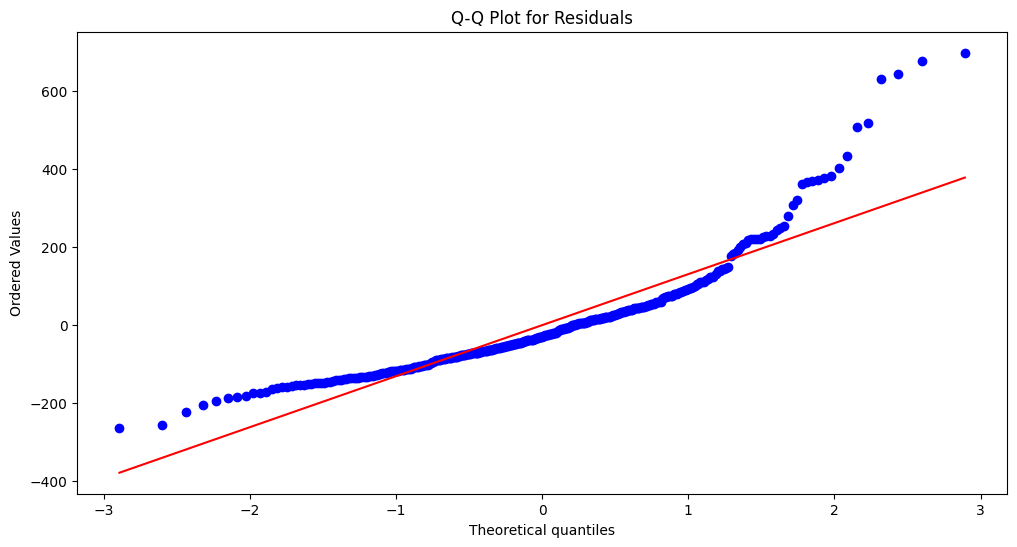

In [205]:
# Q-Q plot ----->  normality
plt.figure(figsize=(12, 6))
stats.probplot(model.resid, plot=plt)
plt.title('Q-Q Plot for Residuals')
plt.show()

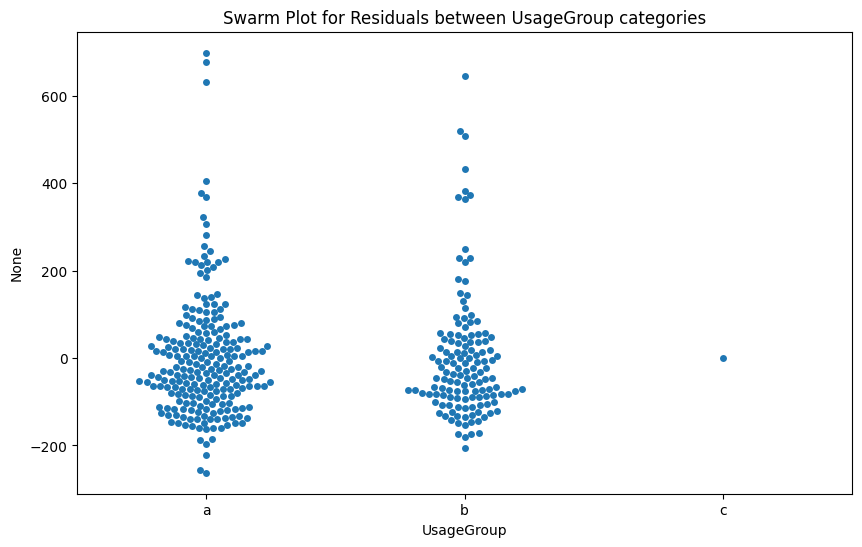

In [206]:
#Swarm plot -----> homogeneity
plt.figure(figsize=(10, 6))
sns.swarmplot(x='UsageGroup', y=model.resid, data=df)
plt.title('Swarm Plot for Residuals between UsageGroup categories')
plt.show()

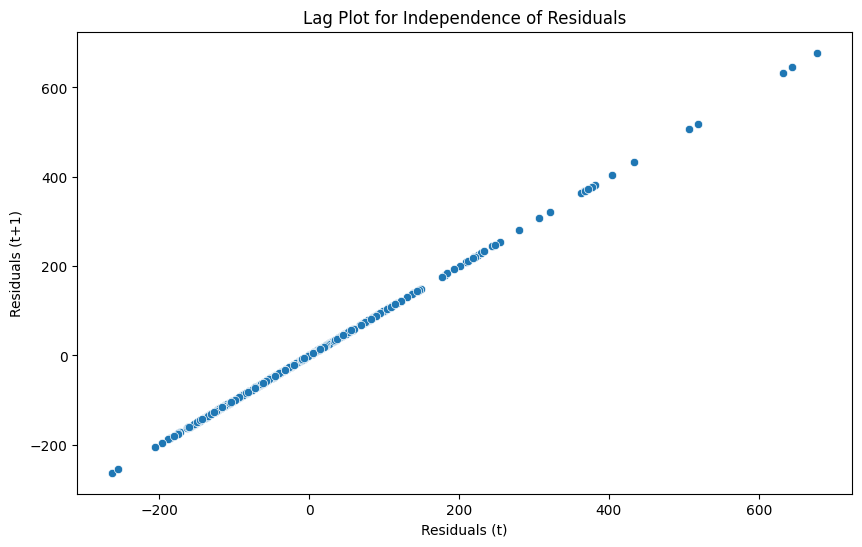

In [207]:
# Lag plot for independence
plt.figure(figsize=(10, 6))
sns.scatterplot(x=model.resid[:-1], y=model.resid[1:])
plt.title('Lag Plot for Independence of Residuals')
plt.xlabel('Residuals (t)')
plt.ylabel('Residuals (t+1)')
plt.show()

the graph suggests that there might be some autocorrelation in the residuals

In [208]:
#Troubleshooting 

#checking for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# Durbin-Watson test
durbin_watson_statistic = durbin_watson(model.resid)
print(f'Durbin-Watson Statistic: {durbin_watson_statistic}')

Durbin-Watson Statistic: 0.05723641687307123


**Findings**

The Durbin-Watson statistic I calculated is quite low, around 0.0572. This low value signals a strong positive autocorrelation in the residuals. Showing that the errors in my predictions are connected over time, which goes against one of the assumptions I made when using regression analysis. In simpler terms, it suggests that the errors from one prediction affect the errors of the next prediction, making them not entirely independent. This could impact the reliability of my regression model.

In [211]:
print(df['VS_RT_After'].dtype)
df = df.dropna(subset=['VS_RT_After'])

float64


In [212]:
posthoc_usage = pairwise_tukeyhsd(df['VS_RT_After'], df['UsageGroup'])
print("\nTukey's HSD Results for UsageGroup:")
print(posthoc_usage)


TypeError: '<' not supported between instances of 'float' and 'str'

# Referencing 

•(i) Iterate over unique levels of 'UsageGroup': https://pandas.pydata.org/docs/user_guide/groupby.html